# Recomendar nuevos temas en Spotify
<img src="spotify.png" alt="Drawing" style="width: 100%;height: 400px"/>


## Definición de pregunta o problema


 > El objetivo aquí es poder estimar si un  tema nuevo será del gusto de la persona que tiene esta playlist activa. En este  caso 
 la variable label corresponde a nuestra variable de salida a analizar.

## Varibles del dataset

**Aclaración**: El significado de cada variable fue extraido de la pagina oficial de Spotify for Developers con el siguiente URL: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

- **acousticness**: Número [float]  
  Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. Un valor de 1.0 representa alta confianza en que la pista es acústica.  
  **Rango**: 0 - 1

- **danceability**: Número [float]  
  La bailabilidad describe cuán adecuada es una pista para bailar, basada en una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0.0 es lo menos bailable y 1.0 es lo más bailable.

- **duration_ms**: Entero [integer]  
  La duración de la pista en milisegundos.

- **energy**: Número [float]  
  La energía es una medida de 0.0 a 1.0 que representa una medida perceptual de intensidad y actividad. Generalmente, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Las características perceptuales que contribuyen a este atributo incluyen el rango dinámico, la sonoridad percibida, el timbre, la frecuencia de inicio y la entropía general.

- **instrumentalness**: Número [float]  
  Predice si una pista no contiene voces. Los sonidos como "Ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor es la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0.5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1.0.

- **key**: Entero [integer]  
  La clave en la que se encuentra la pista. Los enteros se asignan a tonos utilizando la notación estándar de clase de tono. 0 = C (Do), 1 = C♯/D♭ (Do sostenido/Re bemol), 2 = D (Re), 3 = D♯/E♭ (Re sostenido/Mi bemol), 4 = E (Mi), 5 = F (Fa), 6 = F♯/G♭ (Fa sostenido/Sol bemol), 7 = G (Sol), 8 = G♯/A♭ (Sol sostenido/La bemol), 9 = A (La), 10 = A♯/B♭ (La sostenido/Si bemol), 11 = B (Si). -1 indica que no se detectó una clave.  
  **Rango**: -1 - 11 (El presente dataset no posee valores valores negativos)

- **liveness**: Número [float]  
  Detecta la presencia de una audiencia en la grabación. Los valores altos de vivacidad representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor superior a 0.8 indica una alta probabilidad de que la pista sea en vivo.

- **loudness**: Número [float]  
  La sonoridad total de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa entre pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicamente oscilan entre -60 y 0 dB.

- **mode**: Entero [integer]  
  Indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor por 0.

- **speechiness**: Número [float]  
  La cualidad de habla detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida al habla sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente están compuestas completamente de palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener tanto música como habla, ya sea en secciones o superpuestas, como en el caso del rap. Los valores por debajo de 0.33 representan probablemente música y otras pistas no parecidas al habla.

- **tempo**: Número [float]  
  El tempo general estimado de una pista en pulsos por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración promedio del pulso.

- **time_signature**: Entero [integer]  
  Una firma de tiempo estimada. La firma de tiempo (metro) es una convención notacional que especifica cuántos tiempos hay en cada compás. La firma de tiempo varía de 1 a 5, indicando firmas de tiempo de "3/4" a "7/4". 1 representa un compás de 3/4 (valses y baladas), 2 es 4/4 (el más común en pop y rock), 3 es 5/4 (jazz y experimental), 4 es 6/4 o 6/8 (baladas y piezas clásicas) y 5 es 7/4 (progresivo y complejo).   
  **Rango**: 1 - 5 (En la pagina mencionada al comienzo esta variable toma el rango 3 - 7; al tener el mismo rango y valores a adoptar, se extrapola el rango 3 - 7 con 1 - 5 del presente dataset)

- **valence**: Número [float]  
  Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

- **label**: Entero [integer]  
  Indica si una canción es del gusto de la persona que escucha esta playlist. Un valor de **1** significa que la canción le gusta a la persona, mientras que un valor de **0** indica que no le gusta.

Las variables time_signature, mode y key son las que se consideraron discretas, mientras que el resto fueron consideradas continuas

In [1]:
#%matplotlib inline

In [2]:
# Librerías Generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from tabulate import tabulate

# Librerías para Análisis y Preparación de Datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.decomposition import PCA

# Librerías para Modelado y Entrenamiento
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Librerías para Evaluación de Modelos
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, accuracy_score

# Librerías Adicionales para Visualización de Árboles
from six import StringIO
from IPython.display import Image, display
import pydotplus
import sklearn


---
## Adquirir datos de entrenamiento y prueba.



- Primero cargamos los datos de entrenamiento en Pandas DataFrames.

In [3]:
df = pd.read_csv('dataset/data_playlist.csv')

- Separamos los datos entrenamiento y testeo

In [4]:
X = df.iloc[:, :-1]  # Características (input)
y = df.iloc[:, -1]   # Etiquetas o target (output)

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_comp = X_train
X_train_comp['label'] = y_train



- Para el tratamiento de los datos necesitaremos el dataset de entrenamiento completo, por lo que definimos una variable X_train_comp a la que le agregamos la variable objetivo  'label'

In [5]:
X_train_comp = X_train
X_train_comp['label'] = y_train

- Observamos que cantidad de datos nos queda disponible en el set de entrenamiento y el tipo de cada variable.

In [6]:
X_train_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 382 to 102
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      525 non-null    float64
 1   danceability      525 non-null    float64
 2   duration          525 non-null    int64  
 3   energy            525 non-null    float64
 4   instrumentalness  525 non-null    float64
 5   key               525 non-null    int64  
 6   liveness          525 non-null    float64
 7   loudness          525 non-null    float64
 8   mode              525 non-null    int64  
 9   speechiness       525 non-null    float64
 10  tempo             525 non-null    float64
 11  time_signature    525 non-null    int64  
 12  valence           525 non-null    float64
 13  label             525 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 61.5 KB


**¿Cuáles son los tipos de datos?**


- 9 features son números flotantes.
- Cinco features son strings.

In [7]:
X_train

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
382,0.713000,0.606,244027,0.4570,0.000025,6,0.0747,-14.035,0,0.0497,92.033,4,0.813,1
407,0.000378,0.788,270545,0.6960,0.087000,7,0.0754,-4.512,1,0.0417,109.981,4,0.259,0
235,0.652000,0.627,219040,0.1320,0.000000,0,0.4300,-13.357,1,0.7210,167.127,4,0.256,0
456,0.583000,0.549,212307,0.6510,0.000000,0,0.1210,-7.097,1,0.0323,122.818,4,0.368,1
209,0.859000,0.373,268000,0.0979,0.000000,1,0.0554,-19.385,1,0.0484,148.563,4,0.173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.009100,0.405,220333,0.7600,0.000000,7,0.3750,-4.863,1,0.0407,109.875,4,0.317,1
106,0.004640,0.321,189480,0.9550,0.008970,10,0.2690,-2.749,0,0.1460,167.467,4,0.331,1
270,0.232000,0.675,123079,0.6670,0.000000,0,0.0813,-7.009,1,0.0785,141.943,4,0.493,1
435,0.066200,0.715,184918,0.6870,0.000000,8,0.0663,-6.277,1,0.3120,177.032,4,0.697,0


---

- Observamos las primeras 5 filas del set de datos.

---

In [8]:
X_train.head(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
382,0.713000,0.606,244027,0.4570,0.000025,6,0.0747,-14.035,0,0.0497,92.033,4,0.813,1
407,0.000378,0.788,270545,0.6960,0.087000,7,0.0754,-4.512,1,0.0417,109.981,4,0.259,0
235,0.652000,0.627,219040,0.1320,0.000000,0,0.4300,-13.357,1,0.7210,167.127,4,0.256,0
456,0.583000,0.549,212307,0.6510,0.000000,0,0.1210,-7.097,1,0.0323,122.818,4,0.368,1
209,0.859000,0.373,268000,0.0979,0.000000,1,0.0554,-19.385,1,0.0484,148.563,4,0.173,1


#### **Features numéricos**

Como observamos con la funcion info todas las features de este dataset son numericas podemos separarlas en  

- Continuas: acousticness, danceability, duration, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence.
- Discretas: key, mode, time_signature

#### Tipos de datos

- 10 features son números flotantes.
- 4 features son enteros.

---
#### **Valores Nulos**

- A continuacion verificamos si tenemos valores nulos en el dataset y los sumamos para cada una de las variables.

In [9]:
X_train_comp.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

- Observamos que no tenemos valores nulos en nuestro dataset.
---


-  Observamos si el dataset tiene valores con guiones --> observacion: esta parte la quitaria, creo que no tiene sentido buscar guiones en un datset que no tiene strings  


In [10]:
tienen_guion = X_train.astype('str').eq('-').any(axis=0)
tienen_guion

acousticness        False
danceability        False
duration            False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
label               False
dtype: bool



-  El dataframe no contiene guiones

---

---
#### **Valores Maximos y minimos del dataset**

In [11]:
min_max_values = X_train.agg(['min', 'max'])
print(tabulate(min_max_values, headers='keys', tablefmt='fancy_grid'))


╒═════╤════════════════╤════════════════╤════════════╤══════════╤════════════════════╤═══════╤════════════╤════════════╤════════╤═══════════════╤═════════╤══════════════════╤═══════════╤═════════╕
│     │   acousticness │   danceability │   duration │   energy │   instrumentalness │   key │   liveness │   loudness │   mode │   speechiness │   tempo │   time_signature │   valence │   label │
╞═════╪════════════════╪════════════════╪════════════╪══════════╪════════════════════╪═══════╪════════════╪════════════╪════════╪═══════════════╪═════════╪══════════════════╪═══════════╪═════════╡
│ min │       1.17e-06 │          0.135 │      33840 │  0.00925 │              0     │     0 │      0.024 │    -28.841 │      0 │        0.0237 │  55.747 │                1 │    0.0332 │       0 │
├─────┼────────────────┼────────────────┼────────────┼──────────┼────────────────────┼───────┼────────────┼────────────┼────────┼───────────────┼─────────┼──────────────────┼───────────┼─────────┤
│ max │       0

---
#### **Descripcion estadistica general set completo**
- Debemos comparar si el set de entrenamiento es representativo respecto al set completo


In [12]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


---
#### **Descripcion estadistica general set de entrenamiento**

In [13]:
X_train_comp.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,0.362697,0.597331,220059.678095,0.586747,0.104097,4.740952,0.199054,-8.526710,0.739048,0.098748,120.752286,3.895238,0.498867,0.592381
std,0.341284,0.171891,67639.507074,0.254140,0.265518,3.630019,0.172096,5.146459,0.439573,0.103539,28.037121,0.398562,0.240699,0.491860
min,0.000001,0.135000,33840.000000,0.009250,0.000000,0.000000,0.024000,-28.841000,0.000000,0.023700,55.747000,1.000000,0.033200,0.000000
25%,0.043500,0.477000,184693.000000,0.416000,0.000000,1.000000,0.093200,-10.013000,0.000000,0.035800,99.165000,4.000000,0.302000,0.000000
50%,0.232000,0.606000,215160.000000,0.621000,0.000007,5.000000,0.127000,-7.273000,1.000000,0.049000,121.041000,4.000000,0.492000,1.000000
75%,0.695000,0.714000,245387.000000,0.790000,0.002570,8.000000,0.249000,-5.157000,1.000000,0.113000,139.695000,4.000000,0.685000,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.913000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


#### **Distribución de la feature label y comparación con el set completo**

- **Label** es una variable categórica binaria con valores 0 y 1.
- El promedio en el set de entrenamiento es de 0.592381 indica que aproximadamente el 59.2% de las canciones le gusta al usuario y el 40.8% no le gusta.
- En el set completo el 60% de las canciones les gustaron al usuario por lo que el valor del set de entrenamiento es representativo del conjunto completo.



---
#### **Observaciones sobre el resto de las features que nos parecieron relevantes**

- **Duration**: la duración promedio de las canciones es de 220.059 segundos (aproximadamente 3 minutos y 40 segundos).
  - La duración mínima es de 33.84 segundos y la máxima de 675.36 segundos (~11 minutos).
  - La mayoría de las canciones tienen una duración entre 184.693 y 245.387 segundos (3 a 4 minutos).


- **Danceability**: el promedio es de 59%, indicando que las canciones en general son para bailar.

- **Tempo**: el tempo promedio es de 120.75 BPM, lo cual es típico en canciones pop o electrónicas.
    - El rango varía entre 55.747 BPM y 204.162 BPM, abarcando desde baladas lentas hasta canciones rápidas.

- **Time signature**: la mayoría de las canciones tienen compases de 4 tiempos (mediana: 4), con un máximo de 5 tiempos, lo que es menos común.

In [14]:
# Corroboramos si tenemos columnas de tipo Object.   --> tambien borraria si ya comprobamos que todas las columnas son numericas no vamos a tener tipo object 

if not X_train.select_dtypes(include=['object']).empty:
    summary = X_train.describe(include=['O'])
    print(summary)
else:
    print("No hay columnas de tipo 'object' en el DataFrame.")

No hay columnas de tipo 'object' en el DataFrame.


---
-  Creacion de un indice para identificar las observaciones


In [15]:
X_train.index = range(1, len(X_train) + 1)
X_train.index.name = 'song'

In [16]:
# Usando pandas profiling
report = ProfileReport(X_train, title='Spotify Songs', minimal=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Graficos

### Graficos de relaciones

In [17]:
# Crear la figura para el gráfico
plt.figure(figsize=(10, 8), dpi=100)

# Generar el heatmap con la matriz de correlación
sns.heatmap(X_train_comp.corr(), cmap="coolwarm", annot=True, fmt=".2f")

# Añadir un título al gráfico
plt.title("Mapa de calor de correlaciones incluyendo la variable objetivo")
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\946308467.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


#### Conclusiones al ver el grafico de correlaciones

#### Correlaciones Negativas Fuertes
- **acousticness y energy (-0.79)**: Las canciones con alta *acousticness* tienden a tener menos *energy*, lo cual es típico en música acústica, que suele ser más suave e intensa. La música enérgica es menos acústica, frecuentemente más orientada hacia producciones electrónicas o de alta intensidad.

#### Correlaciones Positivas Fuertes
- **energy y loudness (0.83)**: La energía de una canción está fuertemente relacionada con su volumen, dado que ambos atributos contribuyen a la percepción de intensidad.

#### Correlaciones Negativas Moderadas
- **acousticness y loudness (-0.70)**: Las canciones acústicas tienden a ser menos fuertes en volumen, acorde a la naturaleza de este estilo.
- **acousticness y danceability (-0.43)**: Las canciones acústicas tienden a ser menos bailables, ya que suelen carecer de ritmos repetitivos y marcados.
  
#### Correlaciones Positivas Moderadas
- **danceability y valence (0.50)**: Las canciones bailables suelen tener un tono positivo, típico en géneros como pop y dance. La positividad en una canción está asociada con su bailabilidad.
- **danceability con loudness (0.40) y energy(0.35)**: Canciones con ritmo bailable tienden a ser más fuertes y enérgicas.
- **energy y valence (0.39)**: Las canciones enérgicas suenan más positivas, un patrón común en géneros de alta energía.

#### Correlaciones Bajas
- **instrumentalness y acousticness (0.36)**: Las canciones instrumentales suelen ser ligeramente más acústicas.
- **loudness y valence (0.34)**: Canciones fuertes tienden a sonar más positivas.
- **speechiness y danceability (0.27)**: La presencia de palabras habladas está débilmente asociada con la bailabilidad.

#### Correlaciones Muy Bajas o Sin Correlación
- **duration, key, liveness, mode, speechiness, tempo y time_signature**: Estas características muestran correlaciones muy bajas con otras variables, indicando que son más independientes y no afectan significativamente atributos como la energía, la bailabilidad o el volumen de la música.


---

## Gráficos con variables continuas, tiempo considerado como continuo

In [18]:
#Graficos con variables continuas, tiempo considerado como continuo


# Crear un nuevo DataFrame excluyendo las columnas no deseadas
variables_a_excluir = ['time_signature', 'mode', 'key']
X_train_sin_columnas = X_train_comp.drop(columns=variables_a_excluir, errors='ignore')


# Crear pairplot con la variable 'label' como hue
sns.pairplot(X_train_sin_columnas, hue='label', diag_kind="kde", palette="husl", corner=True)

# Ajustar el título general del gráfico
plt.suptitle("Pairplot sin 'time_signature', 'mode', 'key' e incluyendo 'label'", y=1.02, fontsize=16)

# Mostrar el gráfico
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\2179076071.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


#### Distribuciones en las Diagonales (Histogramas/Densidad)
Conclusiones de diagonales del pairplot, distribuciones univariadas (KDE o histogramas) para cada característica:

**acousticness**:
- Las canciones con `label=1` (gustan al usuario, en verde) tienden a tener valores más altos en *acousticness* en comparación con las canciones con `label=0` (no gustan, en rojo).
- Esto indica que al usuario le gustan más las canciones acústicas.

**danceability**:
- Las distribuciones son más homogéneas, pero las canciones con `label=1` están ligeramente sesgadas hacia valores más altos, sugiriendo que las canciones bailables son preferidas.

**duration**:
- La duración no parece ser un factor determinante, ya que las distribuciones son similares para ambos valores de `label`.

**energy**:
- Las canciones con `label=0` tienen mayor frecuencia en valores altos de *energy*, mientras que las canciones con `label=1` se concentran más en valores medios-bajos.
- Esto sugiere que al usuario le gustan canciones menos enérgicas.

**instrumentalness**:
- Las canciones con valores más altos en *instrumentalness* tienen mayor probabilidad de estar asociadas con `label=1`, lo que indica que las canciones instrumentales son más del agrado del usuario.

**valence**:
- La positividad (*valence*) de las canciones no muestra diferencias claras entre `label=0` y `label=1`, aunque las canciones con `label=1` tienen una ligera preferencia por valores medios.

#### Relaciones Bivariadas (graficos de dispersion)
Los gráficos fuera de la diagonal muestran cómo se relacionan las características entre sí y cómo se agrupan según `label`:

**acousticness vs energy**:
- Hay una correlación negativa clara: canciones con alta *acousticness* tienden a tener baja *energy*.
- Las canciones con `label=1` están más concentradas en el extremo alto de *acousticness* y bajo de *energy*, reforzando la preferencia por canciones tranquilas y acústicas.

**danceability vs valence**:
- Canciones con mayor *danceability* tienden a tener mayor *valence* (positividad).
- Canciones con `label=1` parecen preferir una combinación de *danceability* moderada y *valence* medio.

**instrumentalness vs duration**:
- Las canciones con valores altos en *instrumentalness* tienden a tener duraciones más largas, y muchas de ellas tienen `label=1`, indicando una preferencia por canciones instrumentales y extendidas.

**loudness vs energy**:
- Existe una correlación positiva fuerte entre *loudness* y *energy*, lo cual es esperado.
- Las canciones con `label=1` se agrupan más en valores bajos de *loudness* y *energy*, indicando que el usuario prefiere canciones menos ruidosas e intensas.

**tempo vs danceability**:
- No hay una relación fuerte aparente entre *tempo* y *danceability*.
- Sin embargo, las canciones con `label=1` parecen preferir valores intermedios de *tempo*.

#### Relacion con label (gusto del usuario)
Con base en el análisis:

- **Al usuario le gustan más las canciones acústicas y tranquilas:**
  - *High acousticness* y *low energy* son características predominantes en las canciones con `label=1`.

- **Preferencia por canciones instrumentales:**
  - Canciones con altos valores de *instrumentalness* tienen una mayor probabilidad de gustarle al usuario.

- **Gusto moderado por la bailabilidad:**
  - Canciones con *danceability* en rangos medios a altos son preferidas.

- **Menor interés en canciones intensas:**
  - Canciones con alta *energy* y *loudness* suelen estar asociadas con `label=0`, indicando que no son del agrado del usuario.

#### 4. Observaciones Adicionales
- No parece haber una relación directa entre la duración de las canciones y el gusto del usuario.
- La variable *valence* (positividad) no es un diferenciador claro entre canciones que le gustan o no al usuario.


In [19]:
# Variables discretas conocidas
variables_discretas = ['time_signature', 'mode', 'key']


# Graficar distribuciones para cada variable discreta
for var in variables_discretas:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=X_train_comp, x=var, hue='label', palette="husl")
    plt.title(f"Distribución de {var} por Label", fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.legend(title='Label', labels=['No Gusta (0)', 'Gusta (1)'])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\3668922302.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\3668922302.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\3668922302.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


#### Gráficos de Variables Discretas, Conclusiones:

**1. Time Signature**
- La mayoría de las canciones tienen un `time_signature=4`, y estas son las que más gustan (`label=1`).
- Los `time_signature=3` y `time_signature=5` también tienen una pequeña representación, pero son menos preferidos.
- Esto refuerza que la mayoría de las canciones populares siguen un compás estándar.

**2. Mode**
- Las canciones en `mode=1` (es decir, en modo mayor) gustan significativamente más al usuario (`label=1`), en comparación con las canciones en `mode=0` (modo menor).
- Esto coincide con la tendencia de que el modo mayor suele transmitir emociones más positivas.

**3. Key**
- La tonalidad (`key`) muestra una amplia distribución.
- Las canciones con tonalidades como `key=0` (C), `key=2` (D), y `key=9` (A) son las más preferidas (`label=1`).
- Otras tonalidades, como `key=3` y `key=10`, tienen menos canciones favoritas.

#### Observaciones Generales
- El `mode` parecen ser los atributos más influyentes para determinar las canciones que gustan al usuario.
- El `time_signature` estándar (4/4) es una constante en las canciones preferidas, lo que podría indicar que el ritmo juega un papel importante en las preferencias.
- Aunque la tonalidad (`key`) tiene una distribución amplia, algunas tonalidades específicas parecen destacar entre las canciones que gustan.

En general, estos gráficos ofrecen una visión clara de cómo las variables discretas se relacionan con las preferencias del usuario (`label`), lo que puede ser útil para construir modelos predictivos o sistemas de recomendación.


## Analisis de las variables

In [20]:
#Se comprueba de manera grafica si es necesario escalar las varibles

plt.figure(figsize=(12, 6), dpi=150)
sns.violinplot(data=X_train_comp.select_dtypes(include=['float64', 'int64']))
plt.ylabel("Escala", fontsize=12)
plt.xlabel("Variables", fontsize=12)
plt.title("Distribución de las variables del Dataset de Canciones", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\4066005444.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


La duration esta fuera de escala comparada con el resto de variables. Es un problema que hay que solucionar

## Escalado

Se prueba el metodo de elbow con las varibles escaladas para 

### k - means

K means es muy utilizado para problemas de recomendaciones. Se prueba con 6 clusters respaldado con el metodo elbow en 2 dimensiones y luego lo mismo pero en 3 dimesiones

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_comp)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10).fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\2759806382.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [22]:
# Estándarizar las variables del dataset
scaler_standard = StandardScaler()

X_standard_scaled = scaler_standard.fit_transform(X_train_comp.select_dtypes(include=['float64', 'int64']))

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
songs_PCA_standard = pca.fit_transform(X_standard_scaled)

# Aplicar K-Means con variables escaladas
n_clusters = 4  # Cambiar si es necesario
kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42, n_init=30)
clusters_standard = kmeans_standard.fit_predict(songs_PCA_standard)

# Visualización de los clusters en las dos dimensiones principales
plt.figure(figsize=(8, 6))
plt.scatter(songs_PCA_standard[:, 0], songs_PCA_standard[:, 1], c=clusters_standard, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_standard.cluster_centers_[:, 0], kmeans_standard.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroides')
plt.title('K-means con StandardScaler y PCA')
plt.xlabel('Dimensión 1 (escalada)')
plt.ylabel('Dimensión 2 (escalada)')
plt.legend()
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\86429880.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


### Min Max Escaler

In [23]:
# Escalar los datos usando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X_train_comp.select_dtypes(include=['float64', 'int64']))

# Reducción de dimensionalidad con PCA a 2 dimensiones
pca = PCA(n_components=2)
songs_PCA_minmax = pca.fit_transform(X_minmax_scaled)

# Aplicar K-Means con variables escaladas (MinMaxScaler)
n_clusters = 4  # Cambiar si es necesario
kmeans_minmax = KMeans(n_clusters=n_clusters, random_state=42, n_init=30)
clusters_minmax = kmeans_minmax.fit_predict(songs_PCA_minmax)

# Visualización de los clusters con MinMaxScaler
plt.figure(figsize=(8, 6))
plt.scatter(songs_PCA_minmax[:, 0], songs_PCA_minmax[:, 1], c=clusters_minmax, cmap='viridis', alpha=0.7, s=50)
plt.scatter(kmeans_minmax.cluster_centers_[:, 0], kmeans_minmax.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroides')
plt.title('K-means con MinMaxScaler y PCA')
plt.xlabel('Dimensión 1 (escalada)')
plt.ylabel('Dimensión 2 (escalada)')
plt.legend()
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\607090685.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [24]:
# Con StandardScaler
silhouette_standard = silhouette_score(songs_PCA_standard, clusters_standard)

# Con MinMaxScaler
silhouette_minmax = silhouette_score(songs_PCA_minmax, clusters_minmax)

# Resultados
print(f'Silhouette score con StandardScaler: {silhouette_standard}')
print(f'Silhouette score con MinMaxScaler: {silhouette_minmax}')

Silhouette score con StandardScaler: 0.3836626250856002
Silhouette score con MinMaxScaler: 0.6340780877178183


## Deteccion y tratamiento de outliers

In [25]:
# Excluir las variables del análisis
variables_a_excluir = ['time_signature', 'mode', 'key']
columnas_restantes = [col for col in X_train.columns if col not in variables_a_excluir]

# Iterar sobre cada columna numérica restante
for col in columnas_restantes:
    data = X_train[col].values

    # Calcular percentiles y IQR
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cutoff = iqr * 1.5
    lower, upper = q25 - cutoff, q75 + cutoff

    # Identificar índices de outliers
    outliers_idx = np.argwhere((data < lower) | (data > upper))

    # Graficar datos y outliers
    fig, axes = plt.subplots(1, figsize=(18, 6))
    axes.scatter(np.arange(0, data.shape[0]), data, color='g', label='Datos')
    if len(outliers_idx) > 0:  # Graficar solo si hay outliers
        axes.scatter(outliers_idx, data[outliers_idx], color='r', label='Outliers')
    axes.axhline(lower, color="r", linestyle="--", label='Límite inferior')
    axes.axhline(upper, color="r", linestyle="--", label='Límite superior')
    axes.set_title(f'Detección de Outliers en la Variable {col}')
    axes.set_xlabel('Índice')
    axes.set_ylabel('Valores')
    axes.legend()
    plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\3854570913.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Las variables con outliers según el método de desviación estándar o **IQR** son las siguientes:

- **duration**  
- **instrumentalness**  
- **liveness**  
- **loudness**  
- **speechiness**   

### Limpieza del Dataset

#### Verificar duplicados

Debemos verificar que no tenemos datos duplicados en nuestro dataset

In [26]:
X_train_comp[X_train_comp.duplicated(subset=['duration','danceability', 'energy', 'key', 'speechiness','tempo', 'time_signature', 'valence'],keep=False)]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
song,,,,,,,,,,,,,,
116,0.166,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1
208,0.586,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
292,0.586,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
355,0.992,0.525,228253,0.0553,0.933000,2,0.0934,-22.358,1,0.0633,67.325,4,0.256,1
359,0.992,0.525,228253,0.0553,0.933000,2,0.0934,-22.358,1,0.0633,67.325,4,0.256,1
515,0.166,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1
525,0.586,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1


##### En nuestro caso al parecer que tenemos un dataset con valores duplicados, se excluyen de la siguiente manera:

In [27]:
size_antes = len(X_train_comp)
X_train_comp = X_train_comp.drop_duplicates()
size_despues = len(X_train_comp)
print(f'se eliminaron: {size_antes-size_despues} filas duplicadas')

se eliminaron: 4 filas duplicadas


In [28]:
# Separar la columna 'label' en y_train y el resto en X_train
y_train = X_train_comp['label']
X_train = X_train_comp.drop(columns=['label'])

# Verificar los tamaños de X_train y y_train
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")

Tamaño de X_train: (521, 13)
Tamaño de y_train: (521,)


Se eliminaron 4 canciones que se detectaron como duplicadas

### Discretizamos las variables instrumentalness, speechiness y duration que tienen 162, 96 y 53 outliers respectivamente.

#### Motivo para discretizar instrumentalness

- Distribución desigual: tiene una cantidad significativa de valores atípicos (162), lo que sugiere que los valores se concentran en rangos específicos y podrían no ser uniformemente distribuidos.
- Interpretabilidad: instrumentalness mide la probabilidad de que una pista sea instrumental (cercano a 1 es completamente instrumental, cercano a 0 es con presencia vocal). 
- Usabilidad: Discretizar esta variable puede facilitar la agrupación y análisis de tendencias (por ejemplo, si los usuarios prefieren canciones vocales o instrumentales).
- Segmentaremos esto en tres categorías:
  - “Vocal”: 0.0 - 0.3
  - “Mixto”: 0.3 - 0.7
  - “Instrumental”: 0.7 - 1.0

#### Motivo para discretizar speechiness

- Naturaleza de la variable: speechiness mide la cantidad de contenido hablado en una pista, con valores cercanos a 1 indicando una mayor proporción de habla. Esto la hace muy interpretable cuando se categoriza.
- Segmentación natural: Canciones con diferentes niveles de contenido hablado suelen pertenecer a categorías distintas, como música convencional, podcasts, o discursos.
- Outliers significativos: Con 96 valores atípicos, speechiness presenta un rango notable de variabilidad, lo que sugiere que su análisis en forma continua podría ser menos claro.
- Ventajas: Discretizar speechiness puede revelar cómo las preferencias de los usuarios están influidas por el contenido hablado y ayudar a distinguir patrones, como si los usuarios prefieren canciones tradicionales frente a otros formatos como podcasts.
- Categorías para discretizar:
  - Baja (canciones normales): 0.0 - 0.33.
  - Moderada (contenido mixto): 0.33 - 0.66.
  - Alta (principalmente hablado, como podcasts o discursos): 0.66 - 1.0.

#### Motivo para discretizar duration

-	Rango amplio: duration (duración de la pista en milisegundos) tiene valores que varían significativamente, con 53 valores atípicos detectados. Los valores extremos suelen ser canciones muy cortas (como intros) o muy largas (como piezas instrumentales o mixes).
- Interpretabilidad: Los datos de duración en milisegundos no son intuitivos para un análisis rápido. Agruparlos en categorías como corta, media y larga puede hacer que los patrones sean más claros.
- Relevancia para el usuario: Es común que las preferencias de los usuarios varíen según la duración de la canción. Agruparlas puede ayudar a identificar tendencias (por ejemplo, usuarios prefieren canciones de 2 a 4 minutos).
- Categorías para discretizar:
  - Corta: < 120,000 ms (2 minutos).
  - Media: 120,000 ms - 300,000 ms (2 a 5 minutos, típico en canciones).
  - Larga: > 300,000 ms (más de 5 minutos).


In [29]:
# Discretizar instrumentalness
bins_instrumentalness = [0, 0.3, 0.7, 1.0]
labels_instrumentalness = [1, 2, 3]  # ['Vocal', 'Mixto', 'Instrumental']
X_train['instrumentalness_category'] = pd.cut(
    X_train['instrumentalness'], 
    bins=bins_instrumentalness, 
    labels=labels_instrumentalness, 
    include_lowest=True
)

# Discretizar speechiness
bins_speechiness = [0, 0.33, 0.66, 1.0]
labels_speechiness = [1, 2, 3] #['Baja', 'Moderada', 'Alta']
X_train['speechiness_category'] = pd.cut(
    X_train['speechiness'], 
    bins=bins_speechiness, 
    labels=labels_speechiness, 
    include_lowest=True
)

# Discretizar duration
bins_duration = [0, 120000, 300000, float('inf')]
labels_duration = [1, 2, 3]  #  ['Corta', 'Media', 'Larga']  
X_train['duration_category'] = pd.cut(
    X_train['duration'], 
    bins=bins_duration, 
    labels=labels_duration, 
    include_lowest=True
)

# Verificar el resultado
X_train.head()


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,instrumentalness_category,speechiness_category,duration_category
song,,,,,,,,,,,,,,,,
1,0.713000,0.606,244027,0.4570,0.000025,6,0.0747,-14.035,0,0.0497,92.033,4,0.813,1,1,2
2,0.000378,0.788,270545,0.6960,0.087000,7,0.0754,-4.512,1,0.0417,109.981,4,0.259,1,1,2
3,0.652000,0.627,219040,0.1320,0.000000,0,0.4300,-13.357,1,0.7210,167.127,4,0.256,1,3,2
4,0.583000,0.549,212307,0.6510,0.000000,0,0.1210,-7.097,1,0.0323,122.818,4,0.368,1,1,2
5,0.859000,0.373,268000,0.0979,0.000000,1,0.0554,-19.385,1,0.0484,148.563,4,0.173,1,1,2


### Eliminacion de variables Liveness y loudness
- Liveness:
se decide eliminar la variable Liveness porque tiene una correlacion muy debil con las demas variables, por lo que no vale la pena hacer una discretizacion de esta variable
Ademas el criterio para discretizar esta variable es que se debe considerar variables superiores a 0.8 y detectamos que los outliers que  estan por encima de este valor son muy pocos o  insignificantes. 
- Loudness: la variabilidad que aporta esta variable se considera que ya esta capturada por la variable energy(0.83 de correlación) y la variable acousticness(-0.70 de correlación).
  Ademas el criterio para discretizar esta variable es que los outliers esta mas cercanos a el valor 0 que al valor -60 que es el minimo valor, por lo que tampoco tiene sentido discretizar.   

In [30]:
variables_a_excluir = ['liveness', 'loudness','instrumentalness', 'speechiness', 'duration'] #Se eliminan las discretizadas

X_train = X_train.drop(columns=variables_a_excluir, errors='ignore')

X_train


,acousticness,danceability,energy,key,mode,tempo,time_signature,valence,instrumentalness_category,speechiness_category,duration_category
song,,,,,,,,,,,
1,0.713000,0.606,0.4570,6,0,92.033,4,0.813,1,1,2
2,0.000378,0.788,0.6960,7,1,109.981,4,0.259,1,1,2
3,0.652000,0.627,0.1320,0,1,167.127,4,0.256,1,3,2
4,0.583000,0.549,0.6510,0,1,122.818,4,0.368,1,1,2
5,0.859000,0.373,0.0979,1,1,148.563,4,0.173,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
520,0.353000,0.685,0.4810,2,1,116.888,4,0.893,1,1,1
521,0.009100,0.405,0.7600,7,1,109.875,4,0.317,1,1,2
522,0.004640,0.321,0.9550,10,0,167.467,4,0.331,1,1,2


### Agrupaciones

In [31]:
agrupaciones_brillante_oscuro = {
    0: 1,  # C
    1: 0,     # C♯
    2: 1,  # D
    3: 0,     # E♭
    4: 1,  # E
    5: 1,  # F
    6: 0,     # F♯
    7: 1,  # G
    8: 0,     # G♯
    9: 1,  # A
    10: 0,    # B♭
    11: 1  # B
}
# Brillante = 1 Oscuro = 0
X_train['key_grouped'] = X_train['key'].map(agrupaciones_brillante_oscuro)

X_train = X_train.drop(columns='key', errors='ignore')

X_train

,acousticness,danceability,energy,mode,tempo,time_signature,valence,instrumentalness_category,speechiness_category,duration_category,key_grouped
song,,,,,,,,,,,
1,0.713000,0.606,0.4570,0,92.033,4,0.813,1,1,2,0
2,0.000378,0.788,0.6960,1,109.981,4,0.259,1,1,2,1
3,0.652000,0.627,0.1320,1,167.127,4,0.256,1,3,2,1
4,0.583000,0.549,0.6510,1,122.818,4,0.368,1,1,2,1
5,0.859000,0.373,0.0979,1,148.563,4,0.173,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
520,0.353000,0.685,0.4810,1,116.888,4,0.893,1,1,1,1
521,0.009100,0.405,0.7600,1,109.875,4,0.317,1,1,2,1
522,0.004640,0.321,0.9550,0,167.467,4,0.331,1,1,2,0


---

 - ### Categóricas de baja cardinalidad

Reducción de la Dimensionalidad:

### Missings (Trabajando con valores faltantes)

Como vimos anteriormente, este dataset es bastante limpio por lo que no necesitamos hacer un tratamiento de valores faltantes

In [32]:
X_train_comp.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

### Selección de variables

Se intenta identificar que variables que no tienen información relevante y a su vez reducir la dimensionalidad del dataset.  

In [33]:
# Seleccionar solo columnas numéricas
numerical_cols = X_train.select_dtypes(include=['number'])

# Filtrar columnas con varianza menor al umbral (ejemplo: 0.01)
selector = VarianceThreshold(threshold=0.01)
selector.fit(numerical_cols)

# Obtener columnas que pasan el umbral
columns_selected = numerical_cols.columns[selector.get_support()]
columns_removed = list(set(numerical_cols.columns) - set(columns_selected))

print(f"Columnas eliminadas por baja varianza: {columns_removed}")

Columnas eliminadas por baja varianza: []


> Podemos identificar que no tenemos columnas con baja varianza, se usa como criterio una varianza muy baja(threshold=0.01) para saber si una variable esta por debajo de este umbral, si esta por debajo significa que no aporta informacion y que puede ser perfectamente quitada del dataset.
--- 

- También analizamos la correlación de todas las columnas después de hecha la limpieza con la variable label, para saber si vale la pena hacer una limpieza de alguna variable más.

In [34]:
# Calcular correlación de cada columna con `label`
X_train_comp = X_train

X_train_comp['label'] = y_train

correlations = X_train_comp.corr()['label'].sort_values(ascending=False)
print(correlations)

label                        1.000000
acousticness                 0.486013
key_grouped                  0.184644
instrumentalness_category    0.160166
mode                         0.112792
duration_category            0.110568
tempo                       -0.072848
time_signature              -0.122932
speechiness_category        -0.175149
valence                     -0.198928
danceability                -0.388595
energy                      -0.473910
Name: label, dtype: float64


In [35]:
X_train_comp

,acousticness,danceability,energy,mode,tempo,time_signature,valence,instrumentalness_category,speechiness_category,duration_category,key_grouped,label
song,,,,,,,,,,,,
1,0.713000,0.606,0.4570,0,92.033,4,0.813,1,1,2,0,1
2,0.000378,0.788,0.6960,1,109.981,4,0.259,1,1,2,1,0
3,0.652000,0.627,0.1320,1,167.127,4,0.256,1,3,2,1,0
4,0.583000,0.549,0.6510,1,122.818,4,0.368,1,1,2,1,1
5,0.859000,0.373,0.0979,1,148.563,4,0.173,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.353000,0.685,0.4810,1,116.888,4,0.893,1,1,1,1,0
521,0.009100,0.405,0.7600,1,109.875,4,0.317,1,1,2,1,1
522,0.004640,0.321,0.9550,0,167.467,4,0.331,1,1,2,0,1


> Se concluye que no necesitamos hacer una limpieza de otra columna, probablemente convenga quitar **tempo** en un futuro, porque no aportan mucha información para observar si con eso en un futuro incrementamos la precisión de los modelos.

## Visualizando con PCA y t-SNE

In [36]:
# Scaler for scaling the data
class Scaler:
    def __init__(self):
        self.scaler = StandardScaler()
    def fit(self,X):
        self.scaler.fit(X.to_numpy())
        return self
    def transform(self,X):
        npArr = self.scaler.transform(X.to_numpy())
        return pd.DataFrame(npArr, columns=X.columns)
scaler = Scaler()

In [37]:
X_train = X_train.drop(columns='time_signature', errors='ignore')

X_train = X_train.drop(columns='tempo', errors='ignore')

X_train_comp = X_train_comp.drop(columns='time_signature', errors='ignore')

X_train_comp = X_train_comp.drop(columns='tempo', errors='ignore')

X_train_df = X_train_comp

#scale the dataset
scaler.fit(X_train_df)
train = scaler.transform(X_train_df)

X_train_df.head()

,acousticness,danceability,energy,mode,valence,instrumentalness_category,speechiness_category,duration_category,key_grouped,label
song,,,,,,,,,,
1,0.713000,0.606,0.4570,0,0.813,1,1,2,0,1
2,0.000378,0.788,0.6960,1,0.259,1,1,2,1,0
3,0.652000,0.627,0.1320,1,0.256,1,3,2,1,0
4,0.583000,0.549,0.6510,1,0.368,1,1,2,1,1
5,0.859000,0.373,0.0979,1,0.173,1,1,2,0,1


In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_df)

pca.explained_variance_ratio_
#tsne = TSNE(n_components=2, perplexity=10,random_state=10)
projection_2D = pca.fit_transform(X_train_df)

plt.figure(figsize=(15, 15))
plt.scatter(projection_2D[:,0], projection_2D[:,1],
            c=X_train_df['label'], 
            cmap='coolwarm',
            s=20)
plt.axis('off')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\2052095465.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [39]:
pca.explained_variance_ratio_

array([0.30842867, 0.18965801])

In [40]:
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu > 75)
print(
    "El numero minimo de componentes para explicar el 75% de la varianza es: " + str(k)
)
# print("\n")

plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=75, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.show()

El numero minimo de componentes para explicar el 75% de la varianza es: 0


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\1179010458.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[10, 5])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\1179010458.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [41]:
tsne = TSNE(n_components=2, perplexity=10,random_state=20)
projection_2D = tsne.fit_transform(X_train_df)

plt.figure(figsize=(15, 15))
plt.scatter(projection_2D[:,0], projection_2D[:,1],
            c=X_train_df['label'], 
            cmap='coolwarm',
            s=20)
plt.axis('off')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\1251564062.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


### Conclusión de reducción de dimensionalidad
El gráfico muestra que PCA es capaz de capturar parte de la estructura de los datos y separar parcialmente las clases, pero el solapamiento sugiere que las relaciones no lineales podrían ser importantes. Se considera entonces a t-SNE que es un metodo no lineal.
Ademas tenemos un dataset de alta dimensionalidad es decir con PCA usando 2 dimensiones no podemos explicar ni el 75% de los datos, por lo tanto t-SNE es una buena opción para visualizar esos patrones de manera intuitiva.

### Decision Tree

In [42]:
def dibujar_arbol(modelo,target_names,feature_names):
    dot_data = StringIO()
    sklearn.tree.export_graphviz(modelo, out_file=dot_data,  
                    filled=True, 
                    class_names = target_names,
                    feature_names=feature_names,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))


In [43]:
X_train.columns

Index(['acousticness', 'danceability', 'energy', 'mode', 'valence',
       'instrumentalness_category', 'speechiness_category',
       'duration_category', 'key_grouped', 'label'],
      dtype='object')

In [44]:
y_train = pd.DataFrame(y_train)
y_train

,label
song,
1,1
2,0
3,0
4,1
5,1
...,...
520,0
521,1
522,1


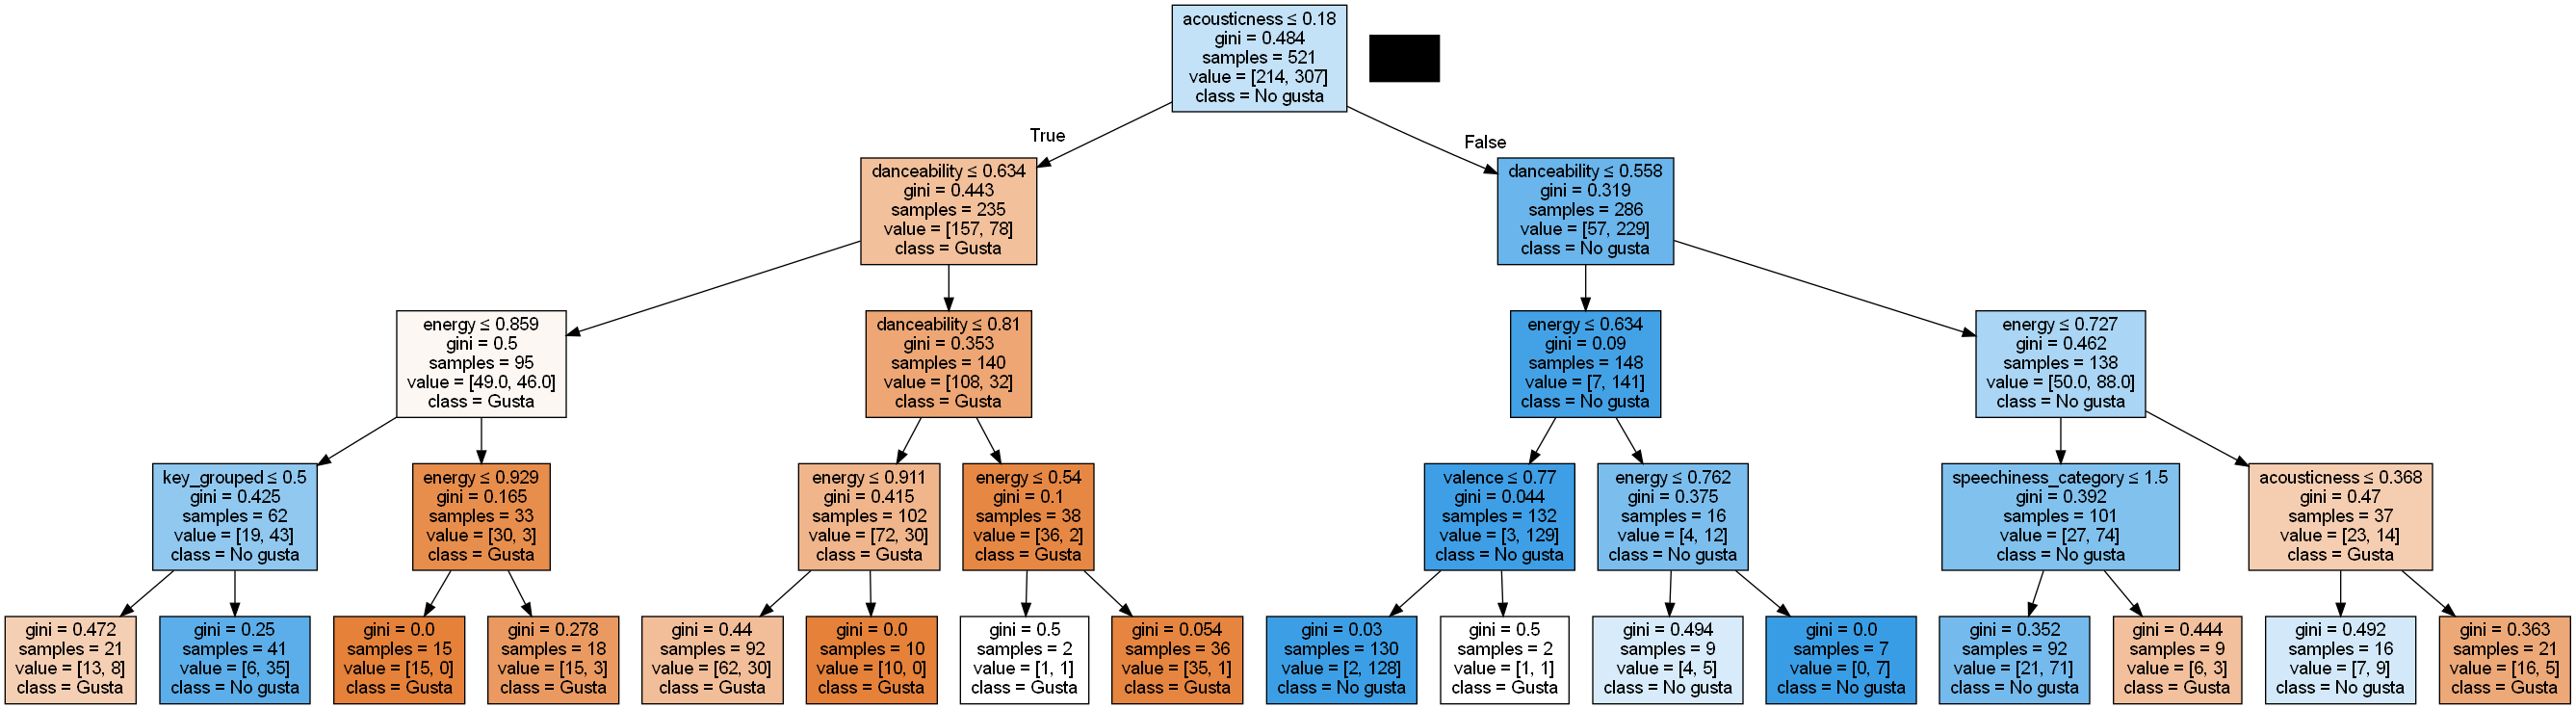

In [45]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=4)

dt.fit(X_train[['acousticness', 'danceability', 'energy', 'mode', 'valence', 'instrumentalness_category',
       'speechiness_category', 'duration_category', 'key_grouped']],y_train['label'])

dibujar_arbol(dt,['Gusta','No gusta'],['acousticness', 'danceability', 'energy', 'mode', 'valence', 'instrumentalness_category',
       'speechiness_category', 'duration_category', 'key_grouped'])

In [46]:
accuracy_score(dt.predict(X_train[['acousticness', 'danceability', 'energy', 'mode', 'valence', 'instrumentalness_category',
       'speechiness_category', 'duration_category', 'key_grouped']]),y_train['label'])

0.8234165067178503

### Comenzamos a dar el mismo tratamiento al conjunto de datos de Test para poder testear el modelo

- Primero Discretizamos 

In [47]:
# Discretizar instrumentalness
bins_instrumentalness = [0, 0.3, 0.7, 1.0]
labels_instrumentalness = [1, 2, 3]  # ['Vocal', 'Mixto', 'Instrumental']
X_test['instrumentalness_category'] = pd.cut(
    X_test['instrumentalness'], 
    bins=bins_instrumentalness, 
    labels=labels_instrumentalness, 
    include_lowest=True
)

# Discretizar speechiness
bins_speechiness = [0, 0.33, 0.66, 1.0]
labels_speechiness = [1, 2, 3] #['Baja', 'Moderada', 'Alta']
X_test['speechiness_category'] = pd.cut(
    X_test['speechiness'], 
    bins=bins_speechiness, 
    labels=labels_speechiness, 
    include_lowest=True
)

# Discretizar duration
bins_duration = [0, 120000, 300000, float('inf')]
labels_duration = [1, 2, 3]  #  ['Corta', 'Media', 'Larga']  
X_test['duration_category'] = pd.cut(
    X_test['duration'], 
    bins=bins_duration, 
    labels=labels_duration, 
    include_lowest=True
)

# Verificar el resultado
X_test.head()


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,instrumentalness_category,speechiness_category,duration_category
506,0.4350,0.658,242861,0.591,0.000082,2,0.123,-5.221,1,0.0647,126.829,4,0.483,1,1,2
357,0.0682,0.602,245053,0.796,0.120000,0,0.150,-3.657,0,0.1030,126.060,4,0.265,1,1,2
133,0.0141,0.697,228427,0.949,0.000000,0,0.748,-7.202,1,0.0353,132.379,4,0.904,1,1,2
250,0.7970,0.292,175667,0.771,0.196000,10,0.148,-3.726,0,0.0453,128.235,4,0.228,1,1,2
299,0.7460,0.486,247227,0.513,0.002130,0,0.113,-9.397,1,0.0349,129.131,4,0.394,1,1,2


- Eliminacion de variables Liveness y loudness


In [48]:
variables_a_excluir = ['liveness', 'loudness','instrumentalness', 'speechiness', 'duration'] #Se eliminan las discretizadas

X_test = X_test.drop(columns=variables_a_excluir, errors='ignore')

X_test

,acousticness,danceability,energy,key,mode,tempo,time_signature,valence,instrumentalness_category,speechiness_category,duration_category
506,0.435000,0.658,0.591,2,1,126.829,4,0.483,1,1,2
357,0.068200,0.602,0.796,0,0,126.060,4,0.265,1,1,2
133,0.014100,0.697,0.949,0,1,132.379,4,0.904,1,1,2
250,0.797000,0.292,0.771,10,0,128.235,4,0.228,1,1,2
299,0.746000,0.486,0.513,0,1,129.131,4,0.394,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
182,0.005590,0.599,0.902,2,1,152.037,4,0.483,1,1,2
569,0.912000,0.787,0.256,7,1,121.014,4,0.851,1,2,2
264,0.000969,0.765,0.857,6,0,127.041,3,0.525,2,1,2
748,0.168000,0.700,0.823,3,1,144.060,4,0.745,1,1,2


In [49]:
agrupaciones_brillante_oscuro = {
    0: 1,  # C
    1: 0,     # C♯
    2: 1,  # D
    3: 0,     # E♭
    4: 1,  # E
    5: 1,  # F
    6: 0,     # F♯
    7: 1,  # G
    8: 0,     # G♯
    9: 1,  # A
    10: 0,    # B♭
    11: 1  # B
}
# Brillante = 1 Oscuro = 0
X_test['key_grouped'] = X_test['key'].map(agrupaciones_brillante_oscuro)

X_test = X_test.drop(columns='key', errors='ignore')
X_test = X_test.drop(columns='tempo', errors='ignore')

X_test = X_test.drop(columns='time_signature', errors='ignore')

X_test

,acousticness,danceability,energy,mode,valence,instrumentalness_category,speechiness_category,duration_category,key_grouped
506,0.435000,0.658,0.591,1,0.483,1,1,2,1
357,0.068200,0.602,0.796,0,0.265,1,1,2,1
133,0.014100,0.697,0.949,1,0.904,1,1,2,1
250,0.797000,0.292,0.771,0,0.228,1,1,2,0
299,0.746000,0.486,0.513,1,0.394,1,1,2,1
...,...,...,...,...,...,...,...,...,...
182,0.005590,0.599,0.902,1,0.483,1,1,2,1
569,0.912000,0.787,0.256,1,0.851,1,2,2,1
264,0.000969,0.765,0.857,0,0.525,2,1,2,0
748,0.168000,0.700,0.823,1,0.745,1,1,2,0


In [50]:
# Hacer predicciones en el conjunto de prueba
y_pred = dt.predict(X_test)

# Evaluar el modelo
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy del modelo: 0.7422222222222222

Matriz de Confusión:
 [[ 59  25]
 [ 33 108]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        84
           1       0.81      0.77      0.79       141

    accuracy                           0.74       225
   macro avg       0.73      0.73      0.73       225
weighted avg       0.75      0.74      0.74       225



### Graficos con dataset definitivo

In [51]:

# Escalar los datos usando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))

# Reducción de dimensionalidad con t-SNE a 2 dimensiones
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
songs_TSNE_minmax = tsne.fit_transform(X_minmax_scaled)

# Aplicar K-Means con las variables reducidas por t-SNE
n_clusters = 4  # Cambiar si es necesario
kmeans_minmax = KMeans(n_clusters=n_clusters, random_state=42, n_init=30)
clusters_minmax = kmeans_minmax.fit_predict(songs_TSNE_minmax)

# Visualización de los clusters con t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(songs_TSNE_minmax[:, 0], songs_TSNE_minmax[:, 1], c=clusters_minmax, cmap='viridis', alpha=0.7, s=50)
plt.scatter(kmeans_minmax.cluster_centers_[:, 0], kmeans_minmax.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, label='Centroides')
plt.title('K-means con MinMaxScaler y t-SNE')
plt.xlabel('Dimensión 1 (t-SNE)')
plt.ylabel('Dimensión 2 (t-SNE)')
plt.legend()
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24988\3756254729.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [53]:
# Con MinMaxScaler
silhouette_minmax = silhouette_score(songs_TSNE_minmax, clusters_minmax)

# Resultados
print(f'Silhouette score con MinMaxScaler: {silhouette_minmax}')

Silhouette score con MinMaxScaler: 0.7111034989356995
